In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyproj

from sklearn.cluster import KMeans, MeanShift, dbscan

In [3]:
df = pd.read_csv('data/filtered_fligth_data.csv')
lons, lats = np.array(df['WGS84_Longitude']), np.array(df['WGS84_Latitude'])
lats = lats[lats != 0]
lons = lons[lons != 0]

bases = [
    ('Rega-Center', 47.457990, 8.572991),
    ('Rega 1', 47.395876, 8.637898),
    ('Rega 2', 47.605896, 7.523330),
    ('Rega 3', 46.909619, 7.504851),
    ('Rega 4', 46.547337, 6.618223),
    ('Rega 5', 46.912776, 9.551239),
    ('Rega 6', 46.163171, 8.881034),
    ('Rega 7', 47.405521, 9.290079),
    ('Rega 8', 46.834069, 8.638286),
    ('Rega 9', 46.530427, 9.878443),
    ('Rega 10', 46.670054, 7.876414),
    ('Rega 12', 47.078150, 9.066240),
    ('Rega 14', 46.554903, 7.379185),
    ('Rega 15', 46.233339, 6.096148),
    ('Trainingsbasis Grenchen', 47.181693, 7.411192)
]

base_lats = np.array([b[1] for b in bases])
base_lons = np.array([b[2] for b in bases])

In [4]:
def dist_to_nearest_base(lat, lon, base_lats, base_lons):
    return min(np.sqrt((lat-b_lat)**2 + (lon-b_lon)**2) for (b_lat, b_lon) in zip(base_lats, base_lons))

def sum_of_distances(lats, lons, base_lats, base_lons):
    return sum(dist_to_nearest_base(lat, lon, base_lats, base_lons) for (lat, lon) in zip(lats, lons))

In [44]:
print(sum_of_distances(lats, lons, base_lats, base_lons))

#cls = KMeans(n_clusters=len(bases),
#                # init=np.c_[base_lons, base_lats],
#                init='k-means++'
#               )
#cls = MeanShift(bin_seeding=True, n_jobs=-1, bandwidth=1)

cores, labels = dbscan(np.c_[lons, lats], min_samples=1890)
print(len(cores), len(labels))
print(cores)

# print(sum_of_distances(lats, lons, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]))
#print(sum_of_distances(lats, lons, cls.cluster_centers_[:,1], cls.cluster_centers_[:,0]))

1959.8694861961594
10 8128
[ 224 1067 1099 1516 1699 2102 3181 3195 7283 7614]


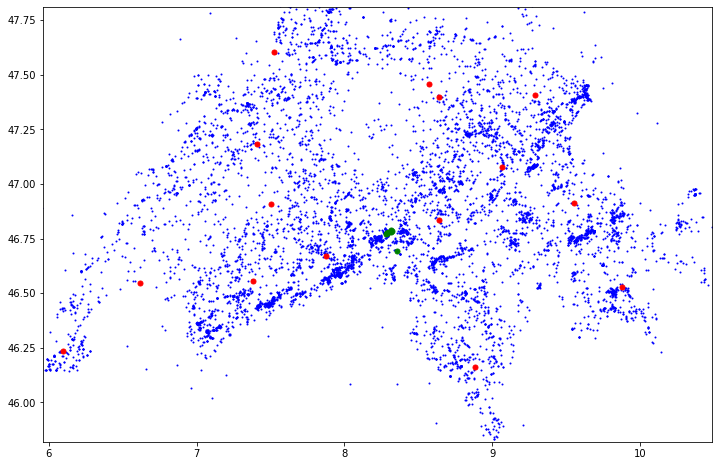

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(lons, lats, s=1, c='blue')
plt.scatter(base_lons, base_lats, s=25, c='red')
plt.scatter(lons[cores], lats[cores], s=25, c='green')
plt.xlim(5.96, 10.49)
plt.ylim(45.82, 47.81)
plt.show()